Retrieved Data:
    id                     Name  MATH608  MATH615  CSCI605  ERTH600
0    1  Govardhan Reddy Baddala        5        8        7        6
1    2       Tushar A Bendarkar        5        7       10        6
2    3     Amol Sanjay Bhalerao        7        6        9        6
3    4       Khushi - Choudhary        9        9       10        8
4    5           Yizhak D Cohen       10        6        9       10
5    6          Jesse C Coulson        8        6        6        5
6    7              Nate Dailey        6       10        9       10
7    8      Zakir Sajid Elaskar        9        7        8        7
8    9  Anand Kumar Gangavarapu        9        8       10        5
9   10        Snehitha Gorantla        8       10        5        5
10  11         Kalyaan Kanugula       10        6        6        7
11  12         Angel M Martinez        9        5        9        8
12  13             Aditi N More        6        7        9        7
13  14       Nayana Nagarajappa 

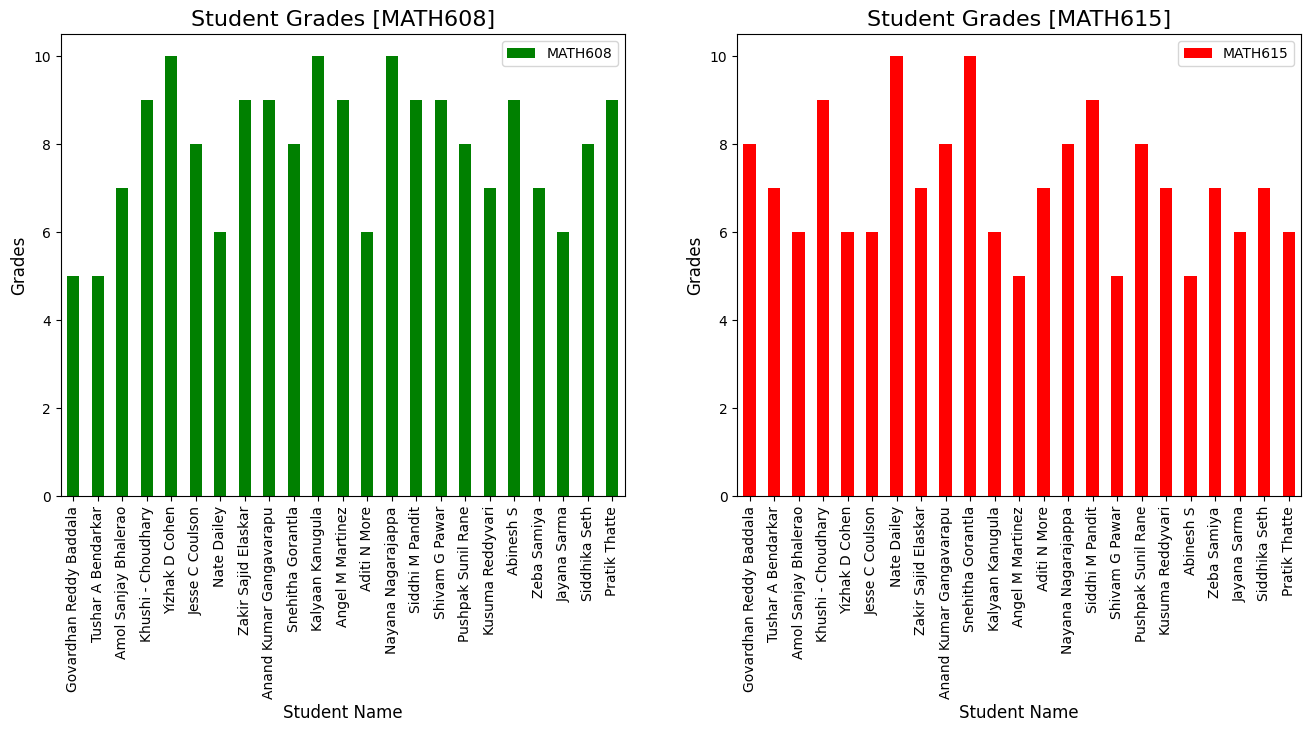

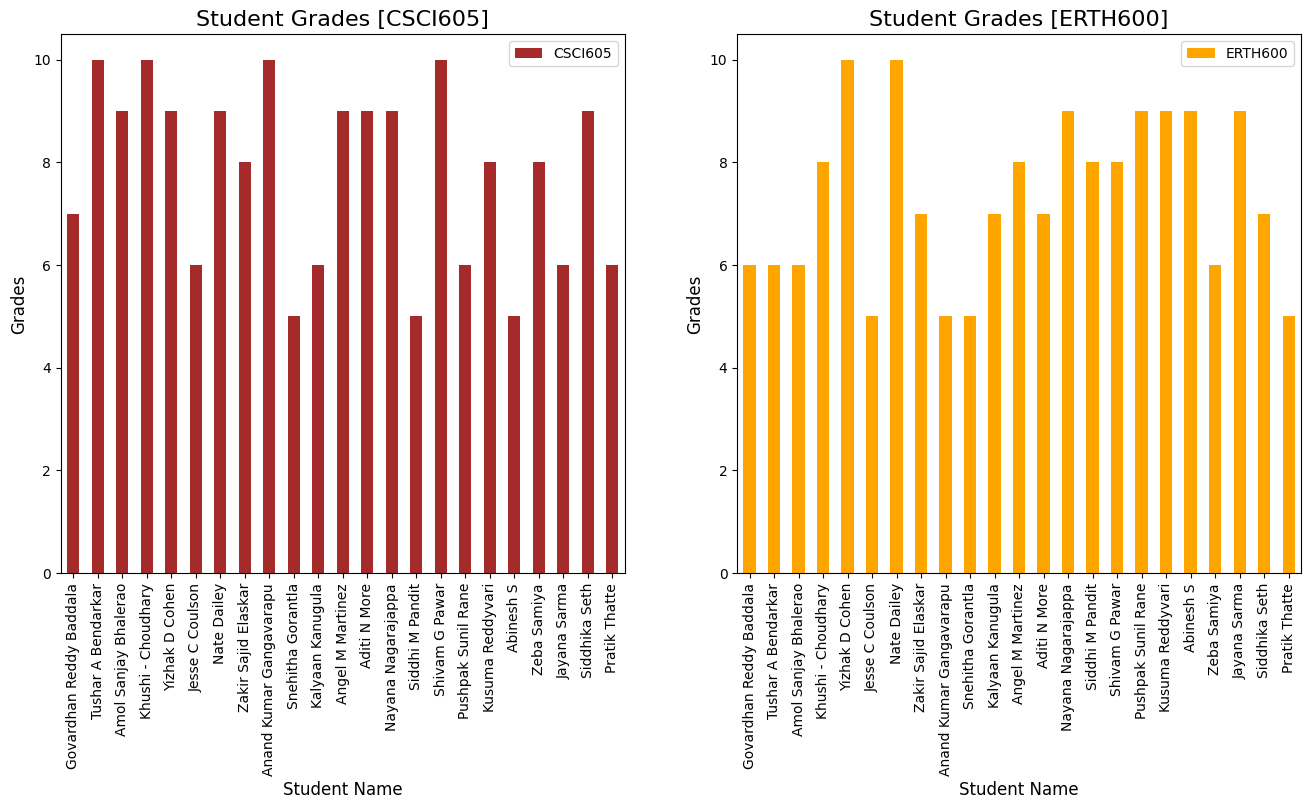

In [76]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
sqlite_conn = sqlite3.connect('sqlite_grades.db')
    
# Retrieve data from the database
query = "SELECT * FROM grades"
df = pd.read_sql_query(query, sqlite_conn)
sqlite_conn.close()

# Print the retrieved data
print("Retrieved Data:")
print(df)


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16, 6))
df.plot(kind = 'bar',x='Name', y='MATH608' , ax = ax1, color = 'green') 
ax1.set_xlabel('Student Name',fontsize = 12) 
ax1.set_ylabel('Grades',fontsize = 12) 
ax1.set_title('Student Grades [MATH608]',fontsize = 16)

df.plot(kind = 'bar',x='Name', y='MATH615' , ax = ax2, color = 'red') 
ax2.set_xlabel('Student Name',fontsize = 12)
ax2.set_ylabel('Grades',fontsize = 12) 
ax2.set_title('Student Grades [MATH615]',fontsize = 16)

fig, (ax3,ax4) = plt.subplots(1,2,figsize=(16, 7))
df.plot(kind = 'bar',x='Name', y='CSCI605' , ax = ax3, color = 'brown') 
ax3.set_xlabel('Student Name',fontsize = 12)
ax3.set_ylabel('Grades',fontsize = 12) 
ax3.set_title('Student Grades [CSCI605]',fontsize = 16)

df.plot(kind = 'bar',x='Name', y='ERTH600' , ax = ax4, color = 'orange')
ax4.set_xlabel('Student Name',fontsize = 12)
ax4.set_ylabel('Grades',fontsize = 12) 
ax4.set_title('Student Grades [ERTH600]',fontsize = 16)
plt.show()

Student Grades of Semester I:

                       Name  MATH608  MATH615  CSCI605  ERTH600
0   Govardhan Reddy Baddala        5        8        7        6
1        Tushar A Bendarkar        5        7       10        6
2      Amol Sanjay Bhalerao        7        6        9        6
3        Khushi - Choudhary        9        9       10        8
4            Yizhak D Cohen       10        6        9       10
5           Jesse C Coulson        8        6        6        5
6               Nate Dailey        6       10        9       10
7       Zakir Sajid Elaskar        9        7        8        7
8   Anand Kumar Gangavarapu        9        8       10        5
9         Snehitha Gorantla        8       10        5        5
10         Kalyaan Kanugula       10        6        6        7
11         Angel M Martinez        9        5        9        8
12             Aditi N More        6        7        9        7
13       Nayana Nagarajappa       10        8        9        9
14       

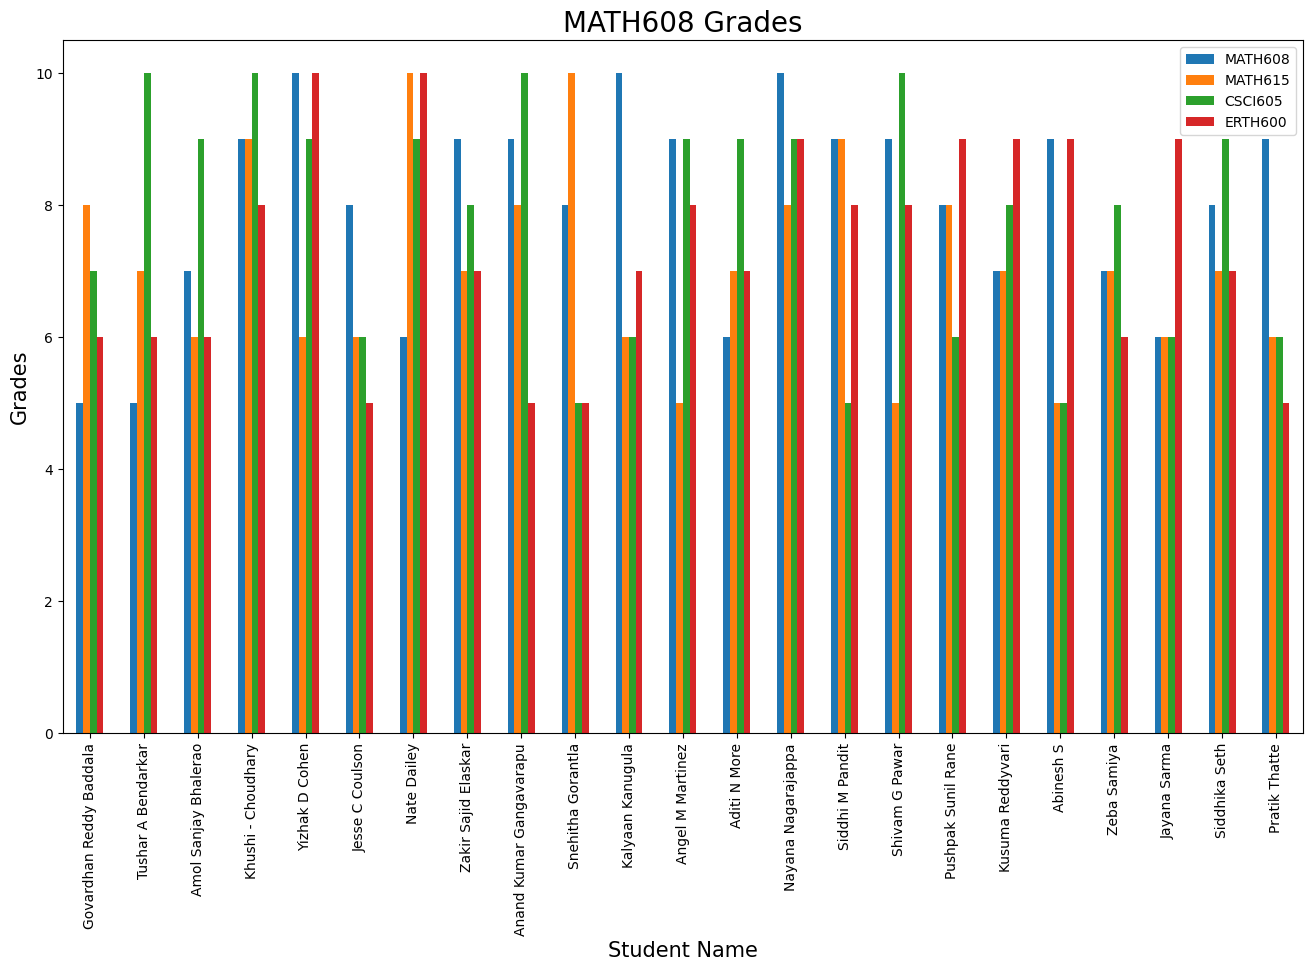

In [75]:
from pymongo import MongoClient

# Connect to MongoDB
student = MongoClient('mongodb://localhost:27017/')
    
# Access the database
ds = student['grades_db']
    
# Access the collection
grades_collection = ds['grades']

# Retrieve data from the collection
grades_data = list(grades_collection.find())
    
# Convert to DataFrame
df = pd.DataFrame(grades_data)

# Drop the MongoDB ObjectId column if present
if '_id' in df.columns:
    df.drop(columns=['_id'], inplace=True)

# Print the retrieved data
print('Student Grades of Semester I:\n')
print(df)

fig, ax1 = plt.subplots(figsize=(16,9)) # Plotting each subject as a separate bar 
df.plot(kind = 'bar',x='Name', y=['MATH608','MATH615','CSCI605','ERTH600'] , ax = ax1) 
ax1.set_xlabel('Student Name',fontsize = 15) 
ax1.set_ylabel('Grades',fontsize = 15) 
ax1.set_title('MATH608 Grades',fontsize = 20)
plt.show()
    
# Close the connection
student.close()